In [2]:
#Install packages:
import numpy as np
import matplotlib as plt
import pandas as pd

import requests
import math
import csv
import matplotlib.patches as mpatches

In [6]:
#open the results from screening by title/abstract in a dataframe:
df = pd.read_csv('../thesis/results_OpenAlex_title_abstract_screening.csv')

In [7]:
df

,"Exclude (0=include, 1=exclude, 2 = duplicate)",Unnamed: 1,id,doi,title,display_name,publication_year,publication_date,type,authorships
0,0,0,https://openalex.org/W3101156210,https://doi.org/10.1109/cvpr.2017.369,ChestX-Ray8: Hospital-Scale Chest X-Ray Databa...,ChestX-Ray8: Hospital-Scale Chest X-Ray Databa...,2017,2017-07-21,proceedings-article,"[{'author_position': 'first', 'author': {'id':..."
1,1,1,https://openalex.org/W2731899572,https://doi.org/10.1007/s12194-017-0406-5,Overview of deep learning in medical imaging,Overview of deep learning in medical imaging,2017,2017-07-08,journal-article,"[{'author_position': 'first', 'author': {'id':..."
2,0,2,https://openalex.org/W2888397986,https://doi.org/10.1186/s12938-018-0544-y,Computer-aided detection in chest radiography ...,Computer-aided detection in chest radiography ...,2018,2018-08-22,journal-article,"[{'author_position': 'first', 'author': {'id':..."
3,1,3,https://openalex.org/W2150835094,https://doi.org/10.1007/s00134-012-2513-4,International evidence-based recommendations f...,International evidence-based recommendations f...,2012,2012-03-06,journal-article,"[{'author_position': 'first', 'author': {'id':..."
4,0,4,https://openalex.org/W2963466845,https://doi.org/10.1609/aaai.v33i01.3301590,CheXpert: A Large Chest Radiograph Dataset wit...,CheXpert: A Large Chest Radiograph Dataset wit...,2019,2019-01-21,journal-article,"[{'author_position': 'first', 'author': {'id':..."
...,...,...,...,...,...,...,...,...,...,...
1447,1,1447,https://openalex.org/W2953697562,https://doi.org/10.1002/ajum.12161,A 9‐year audit of fetal chest masses in an Aus...,A 9‐year audit of fetal chest masses in an Aus...,2019,2019-06-27,journal-article,"[{'author_position': 'first', 'author': {'id':..."
1448,1,1448,https://openalex.org/W2963716134,https://doi.org/10.1017/9781107587908.026,Pulmonary Consult: Management of Severe Hypoxi...,Pulmonary Consult: Management of Severe Hypoxi...,2019,2019-07-01,book-chapter,"[{'author_position': 'first', 'author': {'id':..."
1449,1,1449,https://openalex.org/W4210948731,https://doi.org/10.1016/b978-0-323-60987-6.000...,Acute Heart Failure,Acute Heart Failure,2020,2020-01-01,book-chapter,"[{'author_position': 'first', 'author': {'id':..."
1450,1,1450,https://openalex.org/W2970652729,https://doi.org/10.1111/jpc.14602,Bronchiolitis at a specialist paediatric centr...,Bronchiolitis at a specialist paediatric centr...,2020,2020-02-01,journal-article,"[{'author_position': 'first', 'author': {'id':..."


In [8]:
df.rename(columns = {'Exclude (0=include, 1=exclude, 2 = duplicate)':'screening', 'Unnamed: 1': 'index'}, inplace = True)

In [9]:
df

,screening,index,id,doi,title,display_name,publication_year,publication_date,type,authorships
0,0,0,https://openalex.org/W3101156210,https://doi.org/10.1109/cvpr.2017.369,ChestX-Ray8: Hospital-Scale Chest X-Ray Databa...,ChestX-Ray8: Hospital-Scale Chest X-Ray Databa...,2017,2017-07-21,proceedings-article,"[{'author_position': 'first', 'author': {'id':..."
1,1,1,https://openalex.org/W2731899572,https://doi.org/10.1007/s12194-017-0406-5,Overview of deep learning in medical imaging,Overview of deep learning in medical imaging,2017,2017-07-08,journal-article,"[{'author_position': 'first', 'author': {'id':..."
2,0,2,https://openalex.org/W2888397986,https://doi.org/10.1186/s12938-018-0544-y,Computer-aided detection in chest radiography ...,Computer-aided detection in chest radiography ...,2018,2018-08-22,journal-article,"[{'author_position': 'first', 'author': {'id':..."
3,1,3,https://openalex.org/W2150835094,https://doi.org/10.1007/s00134-012-2513-4,International evidence-based recommendations f...,International evidence-based recommendations f...,2012,2012-03-06,journal-article,"[{'author_position': 'first', 'author': {'id':..."
4,0,4,https://openalex.org/W2963466845,https://doi.org/10.1609/aaai.v33i01.3301590,CheXpert: A Large Chest Radiograph Dataset wit...,CheXpert: A Large Chest Radiograph Dataset wit...,2019,2019-01-21,journal-article,"[{'author_position': 'first', 'author': {'id':..."
...,...,...,...,...,...,...,...,...,...,...
1447,1,1447,https://openalex.org/W2953697562,https://doi.org/10.1002/ajum.12161,A 9‐year audit of fetal chest masses in an Aus...,A 9‐year audit of fetal chest masses in an Aus...,2019,2019-06-27,journal-article,"[{'author_position': 'first', 'author': {'id':..."
1448,1,1448,https://openalex.org/W2963716134,https://doi.org/10.1017/9781107587908.026,Pulmonary Consult: Management of Severe Hypoxi...,Pulmonary Consult: Management of Severe Hypoxi...,2019,2019-07-01,book-chapter,"[{'author_position': 'first', 'author': {'id':..."
1449,1,1449,https://openalex.org/W4210948731,https://doi.org/10.1016/b978-0-323-60987-6.000...,Acute Heart Failure,Acute Heart Failure,2020,2020-01-01,book-chapter,"[{'author_position': 'first', 'author': {'id':..."
1450,1,1450,https://openalex.org/W2970652729,https://doi.org/10.1111/jpc.14602,Bronchiolitis at a specialist paediatric centr...,Bronchiolitis at a specialist paediatric centr...,2020,2020-02-01,journal-article,"[{'author_position': 'first', 'author': {'id':..."


In [10]:
#count number of included, duplicates and excluded:
df_exclude = df.groupby(['screening']).count()

In [11]:
#reset index
df_exclude = df_exclude.reset_index()

In [12]:
df_exclude

,screening,index,id,doi,title,display_name,publication_year,publication_date,type,authorships
0,0,359,359,359,359,359,359,359,359,359
1,1,1076,1076,1076,1074,1074,1076,1076,1076,1076
2,2,17,17,17,17,17,17,17,17,17


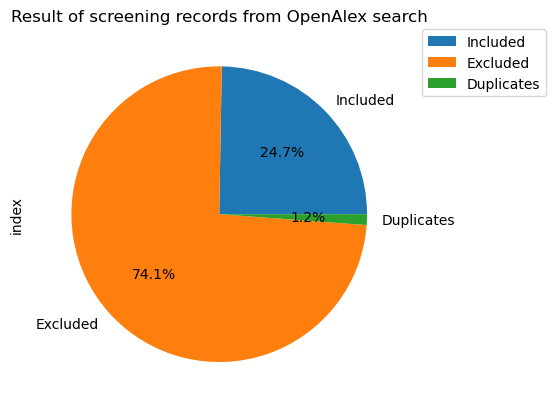

In [13]:
labels = ['Included', 'Excluded', 'Duplicates']
plot = df_exclude.plot.pie(y='index', title="Result of screening records from OpenAlex search", labels=labels,
                   autopct='%1.1f%%')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [14]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

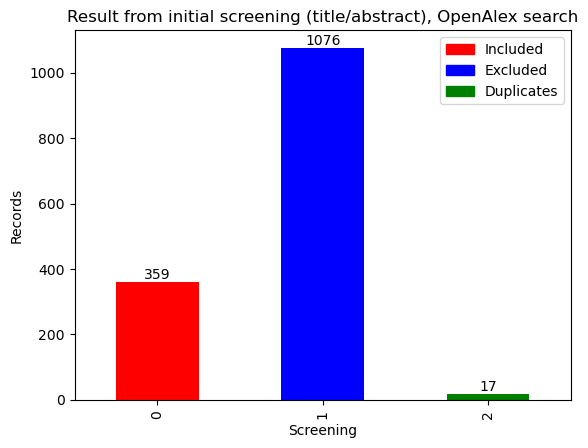

In [79]:
ax = df_exclude.plot.bar(y='index', legend=False, color=['red','blue','green'], title='Result from initial screening (title/abstract), OpenAlex search', ylabel='Records', xlabel='Screening')
#add value labels
ax.bar_label(ax.containers[0])

include_patch = mpatches.Patch(color='red', label='Included')
exclude_patch = mpatches.Patch(color='blue', label='Excluded')
duplicates_patch = mpatches.Patch(color='green', label='Duplicates')
ax.legend(handles=[include_patch, exclude_patch, duplicates_patch])

In [16]:
#drop duplicates (Exclude=2):
df = df[df.screening != 2]

In [17]:
#exclude non-relevant results:
df=df[df.screening !=1]

In [18]:
df

,screening,index,id,doi,title,display_name,publication_year,publication_date,type,authorships
0,0,0,https://openalex.org/W3101156210,https://doi.org/10.1109/cvpr.2017.369,ChestX-Ray8: Hospital-Scale Chest X-Ray Databa...,ChestX-Ray8: Hospital-Scale Chest X-Ray Databa...,2017,2017-07-21,proceedings-article,"[{'author_position': 'first', 'author': {'id':..."
2,0,2,https://openalex.org/W2888397986,https://doi.org/10.1186/s12938-018-0544-y,Computer-aided detection in chest radiography ...,Computer-aided detection in chest radiography ...,2018,2018-08-22,journal-article,"[{'author_position': 'first', 'author': {'id':..."
4,0,4,https://openalex.org/W2963466845,https://doi.org/10.1609/aaai.v33i01.3301590,CheXpert: A Large Chest Radiograph Dataset wit...,CheXpert: A Large Chest Radiograph Dataset wit...,2019,2019-01-21,journal-article,"[{'author_position': 'first', 'author': {'id':..."
5,0,5,https://openalex.org/W2887196013,https://doi.org/10.1155/2018/4168538,Deep Convolutional Neural Networks for Chest D...,Deep Convolutional Neural Networks for Chest D...,2018,2018-08-01,journal-article,"[{'author_position': 'first', 'author': {'id':..."
7,0,7,https://openalex.org/W2939788146,https://doi.org/10.1038/s41598-019-42557-4,Efficient Deep Network Architectures for Fast ...,Efficient Deep Network Architectures for Fast ...,2019,2019-04-18,journal-article,"[{'author_position': 'first', 'author': {'id':..."
...,...,...,...,...,...,...,...,...,...,...
1432,0,1432,https://openalex.org/W2910244294,https://doi.org/10.1109/smc.2018.00231,Mixture of Deep-Learning Experts for Separatio...,Mixture of Deep-Learning Experts for Separatio...,2018,2018-10-01,proceedings-article,"[{'author_position': 'first', 'author': {'id':..."
1438,0,1438,https://openalex.org/W2907454910,https://doi.org/10.1109/bibm.2018.8621320,Classification of radiology reports by modalit...,Classification of radiology reports by modalit...,2018,2018-12-01,proceedings-article,"[{'author_position': 'first', 'author': {'id':..."
1442,0,1442,https://openalex.org/W4256237983,https://doi.org/10.1007/978-3-319-98485-8_15,Public Health and International Epidemiology f...,Public Health and International Epidemiology f...,2019,2019-01-01,book-chapter,"[{'author_position': 'first', 'author': {'id':..."
1445,0,1445,https://openalex.org/W2951846291,https://doi.org/10.1109/isbi.2019.8759532,Boosting the Rule-Out Accuracy of Deep Disease...,Boosting the Rule-Out Accuracy of Deep Disease...,2019,2019-04-01,proceedings-article,"[{'author_position': 'first', 'author': {'id':..."


In [37]:
#open the results from screening by full text in a dataframe:
df_fulltext = pd.read_csv('../thesis/results_OpenAlex_fulltext_screening.csv')

In [38]:
df_fulltext

,Dataset,"Availability (public=0, private = 1)","Screening_fulltext (0=include, 1=exclude, 2 = duplicate, 3=no access to article)","Exclude (0=include, 1=exclude, 2 = duplicate)",Unnamed: 4,id,doi,title,display_name,publication_year,publication_date,type,authorships
0,ChestX-ray8,0,0,0.0,0,https://openalex.org/W3101156210,https://doi.org/10.1109/cvpr.2017.369,ChestX-Ray8: Hospital-Scale Chest X-Ray Databa...,ChestX-Ray8: Hospital-Scale Chest X-Ray Databa...,2017,2017-07-21,proceedings-article,"[{'author_position': 'first', 'author': {'id':..."
1,"Indiana, MC, SH, JSRT, ChestX-ray14",0,0,0.0,2,https://openalex.org/W2888397986,https://doi.org/10.1186/s12938-018-0544-y,Computer-aided detection in chest radiography ...,Computer-aided detection in chest radiography ...,2018,2018-08-22,journal-article,"[{'author_position': 'first', 'author': {'id':..."
2,CheXpert,0,0,0.0,4,https://openalex.org/W2963466845,https://doi.org/10.1609/aaai.v33i01.3301590,CheXpert: A Large Chest Radiograph Dataset wit...,CheXpert: A Large Chest Radiograph Dataset wit...,2019,2019-01-21,journal-article,"[{'author_position': 'first', 'author': {'id':..."
3,ChestX-ray8,0,0,0.0,5,https://openalex.org/W2887196013,https://doi.org/10.1155/2018/4168538,Deep Convolutional Neural Networks for Chest D...,Deep Convolutional Neural Networks for Chest D...,2018,2018-08-01,journal-article,"[{'author_position': 'first', 'author': {'id':..."
4,"MC, SH, Belarus",0,0,0.0,7,https://openalex.org/W2939788146,https://doi.org/10.1038/s41598-019-42557-4,Efficient Deep Network Architectures for Fast ...,Efficient Deep Network Architectures for Fast ...,2019,2019-04-18,journal-article,"[{'author_position': 'first', 'author': {'id':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,NaN,1,1,0.0,1432,https://openalex.org/W2910244294,https://doi.org/10.1109/smc.2018.00231,Mixture of Deep-Learning Experts for Separatio...,Mixture of Deep-Learning Experts for Separatio...,2018,2018-10-01,proceedings-article,"[{'author_position': 'first', 'author': {'id':..."
354,MIMIC-CXR,"0,1",0,0.0,1438,https://openalex.org/W2907454910,https://doi.org/10.1109/bibm.2018.8621320,Classification of radiology reports by modalit...,Classification of radiology reports by modalit...,2018,2018-12-01,proceedings-article,"[{'author_position': 'first', 'author': {'id':..."
355,NaN,NaN,1,0.0,1442,https://openalex.org/W4256237983,https://doi.org/10.1007/978-3-319-98485-8_15,Public Health and International Epidemiology f...,Public Health and International Epidemiology f...,2019,2019-01-01,book-chapter,"[{'author_position': 'first', 'author': {'id':..."
356,"MIMIC-CXR, Chestx-ray8, Indiana",0,0,0.0,1445,https://openalex.org/W2951846291,https://doi.org/10.1109/isbi.2019.8759532,Boosting the Rule-Out Accuracy of Deep Disease...,Boosting the Rule-Out Accuracy of Deep Disease...,2019,2019-04-01,proceedings-article,"[{'author_position': 'first', 'author': {'id':..."


In [41]:
df_fulltext.rename(columns = {'Exclude (0=include, 1=exclude, 2 = duplicate)':'screening_abstract_title','Screening_fulltext (0=include, 1=exclude, 2 = duplicate, 3=no access to article)':'screening_fulltext', 'Availability (public=0, private = 1)': 'Public/Private dataset', 'Unnamed: 4':'index'}, inplace = True)

In [42]:
df_fulltext

,Dataset,Public/Private dataset,screening_fulltext,screening_abstract_title,index,id,doi,title,display_name,publication_year,publication_date,type,authorships
0,ChestX-ray8,0,0,0.0,0,https://openalex.org/W3101156210,https://doi.org/10.1109/cvpr.2017.369,ChestX-Ray8: Hospital-Scale Chest X-Ray Databa...,ChestX-Ray8: Hospital-Scale Chest X-Ray Databa...,2017,2017-07-21,proceedings-article,"[{'author_position': 'first', 'author': {'id':..."
1,"Indiana, MC, SH, JSRT, ChestX-ray14",0,0,0.0,2,https://openalex.org/W2888397986,https://doi.org/10.1186/s12938-018-0544-y,Computer-aided detection in chest radiography ...,Computer-aided detection in chest radiography ...,2018,2018-08-22,journal-article,"[{'author_position': 'first', 'author': {'id':..."
2,CheXpert,0,0,0.0,4,https://openalex.org/W2963466845,https://doi.org/10.1609/aaai.v33i01.3301590,CheXpert: A Large Chest Radiograph Dataset wit...,CheXpert: A Large Chest Radiograph Dataset wit...,2019,2019-01-21,journal-article,"[{'author_position': 'first', 'author': {'id':..."
3,ChestX-ray8,0,0,0.0,5,https://openalex.org/W2887196013,https://doi.org/10.1155/2018/4168538,Deep Convolutional Neural Networks for Chest D...,Deep Convolutional Neural Networks for Chest D...,2018,2018-08-01,journal-article,"[{'author_position': 'first', 'author': {'id':..."
4,"MC, SH, Belarus",0,0,0.0,7,https://openalex.org/W2939788146,https://doi.org/10.1038/s41598-019-42557-4,Efficient Deep Network Architectures for Fast ...,Efficient Deep Network Architectures for Fast ...,2019,2019-04-18,journal-article,"[{'author_position': 'first', 'author': {'id':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,NaN,1,1,0.0,1432,https://openalex.org/W2910244294,https://doi.org/10.1109/smc.2018.00231,Mixture of Deep-Learning Experts for Separatio...,Mixture of Deep-Learning Experts for Separatio...,2018,2018-10-01,proceedings-article,"[{'author_position': 'first', 'author': {'id':..."
354,MIMIC-CXR,"0,1",0,0.0,1438,https://openalex.org/W2907454910,https://doi.org/10.1109/bibm.2018.8621320,Classification of radiology reports by modalit...,Classification of radiology reports by modalit...,2018,2018-12-01,proceedings-article,"[{'author_position': 'first', 'author': {'id':..."
355,NaN,NaN,1,0.0,1442,https://openalex.org/W4256237983,https://doi.org/10.1007/978-3-319-98485-8_15,Public Health and International Epidemiology f...,Public Health and International Epidemiology f...,2019,2019-01-01,book-chapter,"[{'author_position': 'first', 'author': {'id':..."
356,"MIMIC-CXR, Chestx-ray8, Indiana",0,0,0.0,1445,https://openalex.org/W2951846291,https://doi.org/10.1109/isbi.2019.8759532,Boosting the Rule-Out Accuracy of Deep Disease...,Boosting the Rule-Out Accuracy of Deep Disease...,2019,2019-04-01,proceedings-article,"[{'author_position': 'first', 'author': {'id':..."


In [44]:
#count number of included, duplicates and excluded:
df_fulltext_exclude = df_fulltext.groupby(['screening_fulltext']).count()

In [46]:
df_fulltext_exclude = df_fulltext_exclude.reset_index()

In [47]:
df_fulltext_exclude

,screening_fulltext,Dataset,Public/Private dataset,screening_abstract_title,index,id,doi,title,display_name,publication_year,publication_date,type,authorships
0,0,163,163,163,163,163,163,163,163,163,163,163,163
1,1,0,114,158,159,159,159,159,159,159,159,159,159
2,3,0,0,36,36,36,36,36,36,36,36,36,36


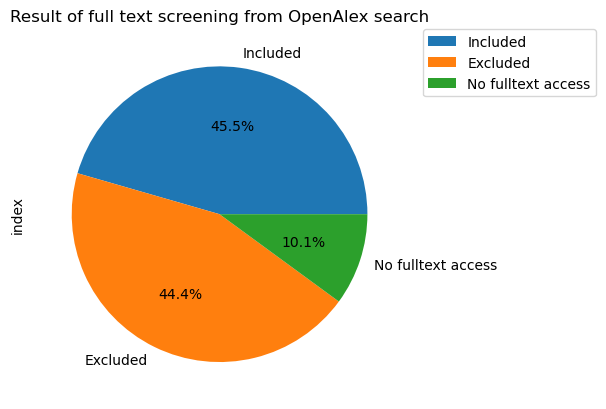

In [49]:
labels = ['Included', 'Excluded', 'No full text access']
plot = df_fulltext_exclude.plot.pie(y='index', title="Result of full text screening from OpenAlex search", labels=labels,
                   autopct='%1.1f%%')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

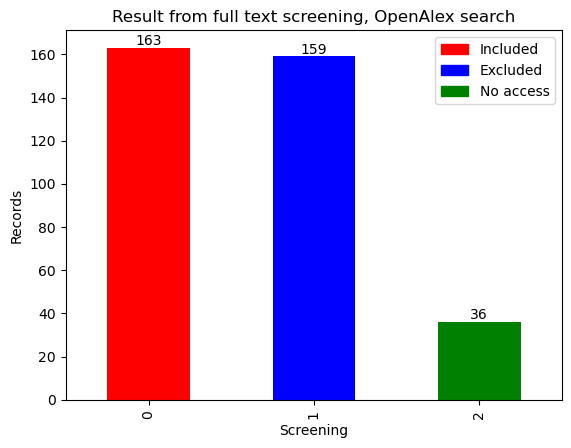

In [83]:
ax = df_fulltext_exclude.plot.bar(y='index', legend=False, color=['red','blue','green'], title='Result from full text screening, OpenAlex search', ylabel='Records', xlabel='Screening')
#add value labels
ax.bar_label(ax.containers[0])
include_patch = mpatches.Patch(color='red', label='Included')
exclude_patch = mpatches.Patch(color='blue', label='Excluded')
no_access_patch = mpatches.Patch(color='green', label='No access')
ax.legend(handles=[include_patch, exclude_patch, no_access_patch])

In [85]:
#Dataset idenfitied from the OpenAlex full text screening:

df_datasets = pd.read_csv('../thesis/OpenAlex_Datasets.csv')

In [86]:
df_datasets

,Dataset,Source
0,Belarus,https://drive.google.com/file/d/1MinxZjUH06VMy...
1,ChestX-ray14,https://nihcc.app.box.com/v/ChestXray-NIHCC
2,ChestX-ray8,https://nihcc.app.box.com/v/ChestXray-NIHCC
3,CheXpert,https://stanfordmlgroup.github.io/competitions...
4,India,https://data.mendeley.com/datasets/rscbjbr9sj/3
5,Indiana,https://openi.nlm.nih.gov/faq#faq-tb-coll
6,JRST,http://www.jsrt.or.jp
7,MC,https://openi.nlm.nih.gov/faq#faq-tb-coll
8,MIMIC-CXR,https://physionet.org/content/mimic-cxr/
9,OPENIST,http://www.chestx-ray.com/index.php/education/...


In [87]:
#13 datasets where identified, though some of these overlap.
df_datasets.count()

Dataset    13
Source     13
dtype: int64